In [6]:
#prepare bins
bins = []
for i in range(0, 75_001, 1000):
    bins.append(i)

In [10]:
file_path1 = 'offsets_MCU1_key1.txt' 
file_path2 = 'offsets_MCU1_key2.txt'  
file_path3 = 'offsets_MCU1_key3.txt'  

offsets1 = []
offsets2 = []
offsets3 = []

with open(file_path1, 'r') as file:
    for line in file:
        offsets1.append(int(line.strip()))

with open(file_path2, 'r') as file:
    for line in file:
        offsets2.append(int(line.strip()))

with open(file_path3, 'r') as file:
    for line in file:
        offsets3.append(int(line.strip()))

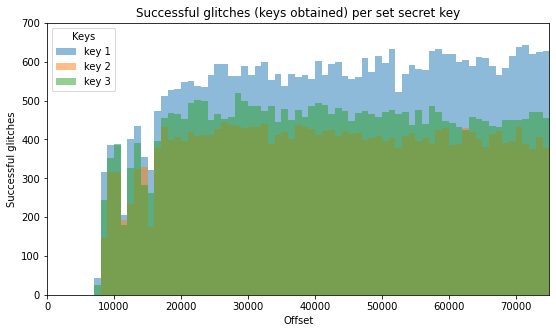

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
#add three histograms to one plot
plt.hist(offsets1, bins=bins, alpha=0.5, label='key 1')
plt.hist(offsets2, bins=bins, alpha=0.5, label='key 2')
plt.hist(offsets3, bins=bins, alpha=0.5, label='key 3')

#add plot title and axis labels
plt.title('Successful glitches (keys obtained) per set secret key')
plt.xlabel('Offset')
plt.ylabel('Successful glitches')
plt.ylim((0,700))
plt.xlim((0,75000))
#add legend
plt.legend(title='Keys')

#display plot
plt.show()

# Rozlozeni podle pouziteho CEC

In [16]:
file_path1 = 'offsets_MCU1_key1.txt' 
file_path2 = 'offsets_MCU2_key1.txt'  
file_path3 = 'offsets_MCU3_key1.txt'  

offsets1 = []
offsets2 = []
offsets3 = []

with open(file_path1, 'r') as file:
    for line in file:
        offsets1.append(int(line.strip()))

with open(file_path2, 'r') as file:
    for line in file:
        offsets2.append(int(line.strip()))

with open(file_path3, 'r') as file:
    for line in file:
        offsets3.append(int(line.strip()))

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
#add three histograms to one plot
plt.hist(offsets1, bins=bins, alpha=0.5, label='MCU 1')
plt.hist(offsets2, bins=bins, alpha=0.5, label='MCU 2')
plt.hist(offsets3, bins=bins, alpha=0.5, label='MCU 3')

#add plot title and axis labels
plt.title('Successful glitches (keys obtained) on different MCUs with dentical settings')
plt.xlabel('Offset')
plt.ylabel('Successful glitches')
plt.ylim((0,700))
plt.xlim((0,75000))

#add legend
plt.legend(title='MCUs')

#display plot
plt.show()

## Bigi modRed attack

### First set (W 45 - 48, O -40 - -44, R 10 - 12)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def load_data(arr_3d, file_name, print_first = True):
    with open(file_name, 'r') as file:
        for line in file:
            # Split the line using commas as separators
            values = line.strip().split(',')
#             print(values)
            # Convert the string values to floats and print them
            floats = [float(val.strip()) for val in values]
            if print_first:
                print("from: ", floats[0:2] , "to: ", int(floats[0] + 0.5), int(floats[1] - 0.5) + 49)
                print_first = False
            arr_3d[int(floats[0] + 0.5), int(floats[1] - 0.5) + 49, int(floats[3])] += 1

In [3]:
glitch_resets  = np.zeros((50, 50, 15))
glitch_success = np.zeros((50, 50, 15))
load_data(glitch_success, 'offsets_bigi_testing_1.txt', True)
load_data(glitch_resets, 'resets_bigi_testing_1.txt', True)


from:  [46.094, -44.141] to:  46 5
from:  [46.094, -44.141] to:  46 5


In [4]:
TRIES_PER_ONE_PARAMS_SETUP = 3930
success_ratios = np.zeros((50, 50, 15))
# Iterate through the array elements using nested loops
for row in range(success_ratios.shape[0]):
    for col in range(success_ratios.shape[1]):
        for repeat in range(success_ratios.shape[2]):
            if glitch_resets[row, col, repeat] == 0 or glitch_success[row, col, repeat] == 0:
                success_ratios[row, col, repeat] = 0
            else:
                success_ratios[row, col, repeat] = (glitch_success[row, col, repeat] / glitch_resets[row, col, repeat]) * 100
                print(f"Width: {row}, Offset: {col - 49}, Repeat: {repeat}, Succes: {int(glitch_success[row, col, repeat]):0>4}, Reset: {int(glitch_resets[row, col, repeat]):0>4}, Normal: {int(TRIES_PER_ONE_PARAMS_SETUP - glitch_resets[row, col, repeat] - glitch_success[row, col, repeat]):0>4}, Success Ratio: {success_ratios[row, col, repeat]:.3f}")


Width: 46, Offset: -44, Repeat: 10, Succes: 0001, Reset: 0040, Normal: 3889, Success Ratio: 2.500
Width: 46, Offset: -44, Repeat: 11, Succes: 0023, Reset: 0255, Normal: 3652, Success Ratio: 9.020
Width: 46, Offset: -44, Repeat: 12, Succes: 0022, Reset: 2564, Normal: 1344, Success Ratio: 0.858
Width: 46, Offset: -43, Repeat: 11, Succes: 0013, Reset: 0086, Normal: 3831, Success Ratio: 15.116
Width: 46, Offset: -43, Repeat: 12, Succes: 0030, Reset: 1528, Normal: 2372, Success Ratio: 1.963
Width: 46, Offset: -42, Repeat: 11, Succes: 0007, Reset: 0071, Normal: 3852, Success Ratio: 9.859
Width: 46, Offset: -42, Repeat: 12, Succes: 0024, Reset: 1441, Normal: 2465, Success Ratio: 1.666
Width: 46, Offset: -41, Repeat: 11, Succes: 0010, Reset: 0043, Normal: 3877, Success Ratio: 23.256
Width: 46, Offset: -41, Repeat: 12, Succes: 0027, Reset: 1094, Normal: 2809, Success Ratio: 2.468
Width: 46, Offset: -40, Repeat: 11, Succes: 0009, Reset: 0061, Normal: 3860, Success Ratio: 14.754
Width: 46, Offset

In [23]:
succ = 0
for elem in np.nditer(success_ratios):
    if elem != 0:
        succ += 1
        
print(f"Overall number of successful glitch params combinations: {succ}")

Overall number of successful glitch params combinations: 20


### Second set (W 47 - 49, O -40 - -44, R 7 - 9)

In [43]:
glitch_resets = np.zeros((50, 50, 10))
glitch_success = np.zeros((50, 50, 10))
load_data(glitch_success, 'offsets_bigi_testing_2.txt', True)
load_data(glitch_resets, 'resets_bigi_testing_2.txt', True)

from:  [48.047, -44.141] to:  48 5
from:  [48.047, -44.141] to:  48 5


In [44]:
TRIES_PER_ONE_PARAMS_SETUP = 3930
success_ratios = np.zeros((50, 50, 10))
# Iterate through the array elements using nested loops
for row in range(success_ratios.shape[0]):
    for col in range(success_ratios.shape[1]):
        for repeat in range(success_ratios.shape[2]):
            if glitch_resets[row, col, repeat] == 0 or glitch_success[row, col, repeat] == 0:
                success_ratios[row, col, repeat] = 0
            else:
                success_ratios[row, col, repeat] = (glitch_success[row, col, repeat] / glitch_resets[row, col, repeat]) * 100
                print(f"Width: {row}, Offset: {col - 49}, Repeat: {repeat}, Succes: {int(glitch_success[row, col, repeat]):0>4}, Reset: {int(glitch_resets[row, col, repeat]):0>4}, Normal: {int(TRIES_PER_ONE_PARAMS_SETUP - glitch_resets[row, col, repeat] - glitch_success[row, col, repeat]):0>4}, Success Ratio: {success_ratios[row, col, repeat]:.3f}")


Width: 48, Offset: -44, Repeat: 9, Succes: 0015, Reset: 0005, Normal: 3910, Success Ratio: 300.000
Width: 48, Offset: -43, Repeat: 9, Succes: 0012, Reset: 0015, Normal: 3903, Success Ratio: 80.000
Width: 48, Offset: -42, Repeat: 9, Succes: 0009, Reset: 0014, Normal: 3907, Success Ratio: 64.286
Width: 48, Offset: -41, Repeat: 9, Succes: 0007, Reset: 0020, Normal: 3903, Success Ratio: 35.000
Width: 48, Offset: -40, Repeat: 9, Succes: 0014, Reset: 0015, Normal: 3901, Success Ratio: 93.333
Width: 49, Offset: -44, Repeat: 9, Succes: 0005, Reset: 2049, Normal: 1876, Success Ratio: 0.244
Width: 49, Offset: -43, Repeat: 8, Succes: 0001, Reset: 0067, Normal: 3862, Success Ratio: 1.493
Width: 49, Offset: -43, Repeat: 9, Succes: 0006, Reset: 1501, Normal: 2423, Success Ratio: 0.400
Width: 49, Offset: -42, Repeat: 9, Succes: 0003, Reset: 1786, Normal: 2141, Success Ratio: 0.168
Width: 49, Offset: -41, Repeat: 9, Succes: 0003, Reset: 1698, Normal: 2229, Success Ratio: 0.177
Width: 49, Offset: -40, 

In [20]:
succ = 0
for elem in np.nditer(success_ratios):
    if elem != 0:
        succ += 1
        
print(f"Overall number of successful glitch params combinations: {succ}")

Overall number of successful glitch params combinations: 12


### Offsets Analysis

In [21]:
def load_offsets(file_name, print_first = True):
    with open(file_name, 'r') as file:
        for line in file:
            # Split the line using commas as separators
            values = line.strip().split(',')
            # Convert the string values to floats and print them
            ints = [int(float(val.strip())) for val in values]
            if print_first:
                print(ints)
                print_first = False
#             offsets[ints[2]] += 1
            offsets.append(ints[2])

In [29]:
offsets = []
load_offsets("offsets_bigi_testing_1.txt")
# load_offsets("offsets_bigi_testing_2.txt")

[46, -44, 153, 10]


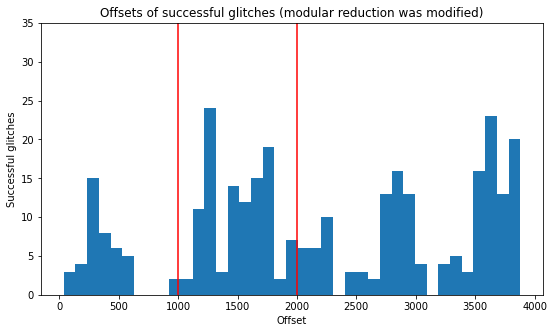

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
#add three histograms to one plot
plt.hist(offsets, bins=39)

#add plot title and axis labels
plt.title('Offsets of successful glitches (modular reduction was modified)')
plt.xlabel('Offset')
plt.ylabel('Successful glitches')
plt.ylim((0,35))

plt.axvline(x = 1000, color = 'r', label = 'axvline - full height')
plt.axvline(x = 2000, color = 'r', label = 'axvline - full height')

#display plot
plt.show()